In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
all_txns = []

with open('/content/groceries.csv') as f:
    # Read each line from the file
    content = f.readlines()
    # Remove white space from the beginning and end of each line
    txns = [x.strip() for x in content if x.strip()]  # Ignore empty lines

    # Iterate through each line and create a list of transactions
    for each_txn in txns:
        # Split the transaction items by comma and filter out any empty items
        txn_items = [item for item in each_txn.split(',') if item]
        if txn_items:  # Only append non-empty transactions
            all_txns.append(txn_items)

In [ ]:
all_txns[0:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
one_hot_encoding = TransactionEncoder()

one_hot_txns = one_hot_encoding.fit(all_txns).transform(all_txns)

one_hot_txns_df = pd.DataFrame(one_hot_txns,
                               columns=one_hot_encoding.columns_)

In [ ]:
one_hot_txns_df.iloc[5:10, 10:20]

,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles
5,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(one_hot_txns_df,
                            min_support=0.02,
                            use_colnames=True)
frequent_itemsets.sample(10, random_state = 90)

,support,itemsets
60,0.020437,"(bottled beer, whole milk)"
52,0.033859,(sugar)
89,0.035892,"(tropical fruit, other vegetables)"
105,0.021047,"(root vegetables, tropical fruit)"
88,0.032740,"(soda, other vegetables)"
16,0.058058,(coffee)
111,0.024504,"(shopping bags, whole milk)"
36,0.079817,(newspapers)
119,0.056024,"(yogurt, whole milk)"
55,0.071683,(whipped/sour cream)


In [ ]:
rules = association_rules(frequent_itemsets, # itemsets
                          metric="lift",     # lift
                          min_threshold=1, num_itemsets=10)

In [ ]:
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,(shopping bags),(other vegetables),0.098526,0.193493,0.023183,0.235294,1.216037,1.0,0.004119,1.054663,0.197073,0.086233,0.051830,0.177552
22,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,1.0,0.010111,1.165467,0.509009,0.107957,0.141975,0.208459
32,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466
31,(frankfurter),(whole milk),0.058973,0.255516,0.020539,0.348276,1.363029,1.0,0.005470,1.142330,0.283031,0.069872,0.124596,0.214329
91,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,1.0,0.021056,1.101913,0.578298,0.154961,0.092487,0.320049


In [ ]:
rules.sort_values('confidence',
                   ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
121,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
16,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
24,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
115,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999
114,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
28,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,1.0,0.013783,1.412030,0.490649,0.103800,0.291800,0.295073
108,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.0,0.013916,1.352735,0.465077,0.109273,0.260757,0.287895
90,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.0,0.021056,1.350401,0.483202,0.154961,0.259479,0.320049
50,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
32,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466


In [ ]:
# Sort the rules by confidence and get the top 10
top10_rules = rules.sort_values(by='confidence', ascending=False).head(50)

In [ ]:
print(top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                             antecedents         consequents   support  \
121           (yogurt, other vegetables)        (whole milk)  0.022267   
16                              (butter)        (whole milk)  0.027555   
24                                (curd)        (whole milk)  0.026131   
115  (root vegetables, other vegetables)        (whole milk)  0.023183   
114        (root vegetables, whole milk)  (other vegetables)  0.023183   
28                       (domestic eggs)        (whole milk)  0.029995   
108                 (whipped/sour cream)        (whole milk)  0.032232   
90                     (root vegetables)        (whole milk)  0.048907   
50                     (root vegetables)  (other vegetables)  0.047382   
32                   (frozen vegetables)        (whole milk)  0.020437   
38                           (margarine)        (whole milk)  0.024199   
0                                 (beef)        (whole milk)  0.021251   
104                     (tropical frui

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

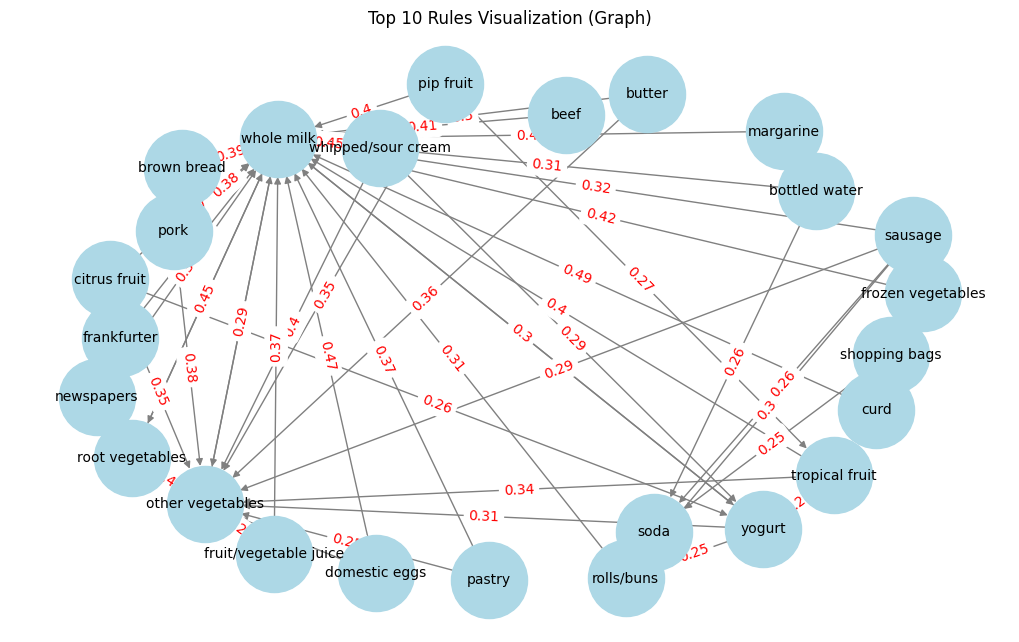

In [ ]:
# Set up the graph
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

# Add nodes and edges for top 10 rules
for idx, rule in top10_rules.iterrows():
    for item in rule['antecedents']:
        G.add_node(item, label=item)
    for item in rule['consequents']:
        G.add_node(item, label=item)
    G.add_edge(list(rule['antecedents'])[0], list(rule['consequents'])[0], weight=rule['confidence'])

# Create a layout for the graph
pos = nx.spring_layout(G, k=2)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in labels.items()}, font_color='red')

# Show the plot
plt.title("Top 10 Rules Visualization (Graph)")
plt.show()